In [37]:
from pyiron import Project
from wmaee.codes.pyiron.pyiron_CHGNet_job import CHGNet
import matplotlib.pyplot as plt

pr = Project('test_CHGNet')

In [9]:
job = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_static_local', delete_existing_job=True)
job.structure = pr.create.structure.bulk('Mo', a=4)
job.calc_static()
job.run()

The job CHGNET_test_static_local was saved and received the ID: 1079


In [10]:
job['input']

{'groups': ['chgnet', 'generic'], 'nodes': ['generic_dict']}

In [11]:
job['output']

{'groups': ['dft', 'generic', 'structure'], 'nodes': []}

In [32]:
job = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_minimize_local', delete_existing_job=True)
job.structure = pr.create.structure.bulk('Mo', a=4)
job.calc_minimize(ionic_force_tolerance=1e-4)
job.run()

The job CHGNET_test_minimize_local was saved and received the ID: 1087


In [13]:
job['input']

{'groups': ['chgnet', 'generic'], 'nodes': ['generic_dict']}

In [33]:
job['output']

{'groups': ['dft', 'generic', 'structure'], 'nodes': []}

In [23]:
remote = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_minimize_remote', delete_existing_job=True)
remote.structure = pr.create.structure.bulk('Al', a=4, cubic=True)
remote.calc_minimize()
remote.fmax = 1e-4
remote.server.queue = 'p2'
remote.run(run_mode='queue')

Job 1086 is waiting in the que!


In [26]:
remote['input']

{'groups': ['input'], 'nodes': ['DICT_VERSION', 'HDF_VERSION', 'NAME', 'OBJECT', 'TYPE', 'VERSION', 'executable', 'job_id', 'server', 'status']}

In [29]:
remote.run(run_mode='queue')
remote.collect_output()

2024-12-11 23:19:10,292 - pyiron_log - WARNING - The job CHGNET_test_minimize_remote is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2024-12-11 23:19:10,292 - pyiron_log - WARNING - The job CHGNET_test_minimize_remote is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [30]:
remote['output']

{'groups': ['dft', 'generic', 'structure'], 'nodes': []}

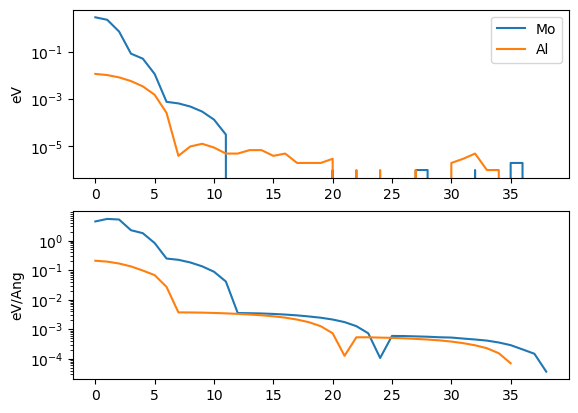

In [34]:
fig, ax = plt.subplots(2,1)
ax[0].plot(job.output.energy_pot-job.output.energy_pot[-1], label='Mo')
ax[0].plot(remote.output.energy_pot-remote.output.energy_pot[-1], label='Al')
ax[1].plot(job['output/generic/max_force'])
ax[1].plot(remote['output/generic/max_force'])
ax[0].legend()
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel('eV')
ax[1].set_ylabel('eV/Ang')
plt.show()

In [35]:
job = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_MD_local')
job.structure = pr.create.structure.bulk('W', a=3, cubic=True)*(3,3,3)
job.calc_md(temperature=1000, n_ionic_steps=1000, n_print=10)
job.run()

2024-12-11 23:21:03,767 - pyiron_log - WARNING - The job CHGNET_test_MD_local is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2024-12-11 23:21:03,767 - pyiron_log - WARNING - The job CHGNET_test_MD_local is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [4]:
job['input']

{'groups': ['chgnet', 'generic'], 'nodes': ['generic_dict']}

In [5]:
job['output']

{'groups': ['generic', 'structure'], 'nodes': []}

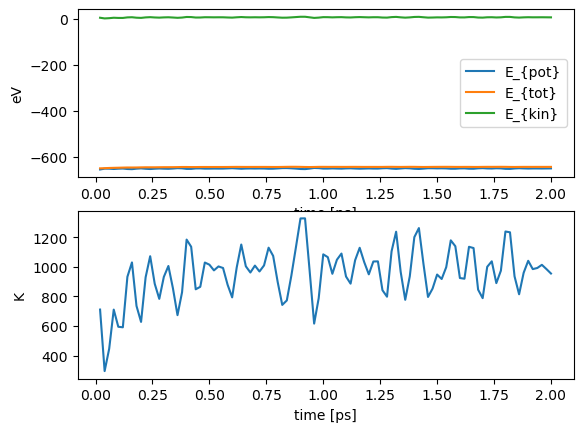

In [36]:
fig, ax = plt.subplots(2,1)
ax[0].plot(job['output/generic/time'], job.output.energy_pot, label='E_{pot}')
ax[0].plot(job['output/generic/time'], job['output/generic/energy_tot'], label='E_{tot}')
ax[0].plot(job['output/generic/time'], job['output/generic/energy_kin'], label='E_{kin}')
ax[1].plot(job['output/generic/time'], job['output/generic/temperature'])
ax[0].legend()
ax[0].set_ylabel('eV')
ax[1].set_ylabel('K')
ax[0].set_xlabel('time [ps]')
ax[1].set_xlabel('time [ps]')
plt.show()